# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress
from pprint import pprint #Delete this

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Delete this

# Set the API base URL

#url = "https://api.openweathermap.org/data/2.5/weather?"

#lat = 41.5047
#lon = -81.6907

#url2 = f"https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid={weather_api_key}"

#city_url = url + f"lat={lat}&lon={lon}&appid={weather_api_key}"

#url3 = "api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=e6d7659ff794c985cd4d7c315cccd3c0"
#api.openweathermap.org/data/2.5/weather?uk&APPID=e6d7659ff794c985cd4d7c315cccd3c0,q=London

#print(requests.get(city_url))

#response = requests.get(city_url).json()

#print(json.dumps(response, indent=4, sort_keys=True))

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #Worked with Rhythm Ahir from BCS to understand URL
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    #while 1==1:
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | le vauclin
Processing Record 3 of Set 1 | el granada
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tromso
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | sept-iles
Processing Record 9 of Set 1 | sarupathar
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | arkalyk
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | robertsport
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | kolonia
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | el tigre
Processing Record 19 of Set 1 | gatesville
Processing Record 20 of Set 1 | ribeira brava
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | edinburgh of the se

Processing Record 36 of Set 4 | papatowai
Processing Record 37 of Set 4 | howard springs
Processing Record 38 of Set 4 | baukau
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | morondava
Processing Record 41 of Set 4 | tazacorte
Processing Record 42 of Set 4 | malabar
Processing Record 43 of Set 4 | mccook
Processing Record 44 of Set 4 | teknaf
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | akureyri
Processing Record 47 of Set 4 | laojunmiao
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | richmond
Processing Record 0 of Set 5 | north bay
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | sitangkai
Processing Record 3 of Set 5 | baardheere
Processing Record 4 of Set 5 | kimbe
Processing Record 5 of Set 5 | kasongo-lunda
Processing Record 6 of Set 5 | pimentel
Processing Record 7 of Set 5 | espargos
City not found. Skipping...
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of 

Processing Record 29 of Set 8 | haiku-pauwela
Processing Record 30 of Set 8 | sao martinho
Processing Record 31 of Set 8 | cabanas
Processing Record 32 of Set 8 | ristiina
Processing Record 33 of Set 8 | concordia
Processing Record 34 of Set 8 | iaciara
Processing Record 35 of Set 8 | nola
Processing Record 36 of Set 8 | puerto lempira
Processing Record 37 of Set 8 | oudtshoorn
Processing Record 38 of Set 8 | newman
Processing Record 39 of Set 8 | karangampel
Processing Record 40 of Set 8 | namtsy
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | kamina
Processing Record 43 of Set 8 | darwin
Processing Record 44 of Set 8 | alaghsas
Processing Record 45 of Set 8 | awjilah
Processing Record 46 of Set 8 | nikolayevsk-on-amure
Processing Record 47 of Set 8 | bakchar
Processing Record 48 of Set 8 | ridgecrest
Processing Record 49 of Set 8 | queenstown
Processing Record 0 of Set 9 | moree
Processing Record 1 of Set 9 | ceerigaabo
Processing Record 2 of Set 9 | lerwick


Processing Record 20 of Set 12 | vorkuta
Processing Record 21 of Set 12 | ust'-uda
Processing Record 22 of Set 12 | pavugada
Processing Record 23 of Set 12 | imbituba
Processing Record 24 of Set 12 | bamboo flat
Processing Record 25 of Set 12 | buala
Processing Record 26 of Set 12 | vorgashor
Processing Record 27 of Set 12 | policka
Processing Record 28 of Set 12 | svetlyy
Processing Record 29 of Set 12 | boden
Processing Record 30 of Set 12 | nolinsk
Processing Record 31 of Set 12 | tomatlan
Processing Record 32 of Set 12 | zaozersk
Processing Record 33 of Set 12 | cove
Processing Record 34 of Set 12 | pitalito
Processing Record 35 of Set 12 | noumea
Processing Record 36 of Set 12 | rupert
Processing Record 37 of Set 12 | motueka
Processing Record 38 of Set 12 | veselyy
Processing Record 39 of Set 12 | castillos
Processing Record 40 of Set 12 | ust'-kut
Processing Record 41 of Set 12 | santa cruz
Processing Record 42 of Set 12 | naze
Processing Record 43 of Set 12 | yerofey pavlovich


In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.18,73,100,1.48,AU,1698569537
1,le vauclin,14.5452,-60.8388,25.03,94,75,2.57,MQ,1698569747
2,el granada,37.5027,-122.4694,16.12,43,0,2.57,US,1698569582
3,waitangi,-43.9535,-176.5597,7.68,89,17,4.26,NZ,1698569545
4,puerto ayora,-0.7393,-90.3518,23.08,91,34,4.02,EC,1698569547


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.18,73,100,1.48,AU,1698569537
1,le vauclin,14.5452,-60.8388,25.03,94,75,2.57,MQ,1698569747
2,el granada,37.5027,-122.4694,16.12,43,0,2.57,US,1698569582
3,waitangi,-43.9535,-176.5597,7.68,89,17,4.26,NZ,1698569545
4,puerto ayora,-0.7393,-90.3518,23.08,91,34,4.02,EC,1698569547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

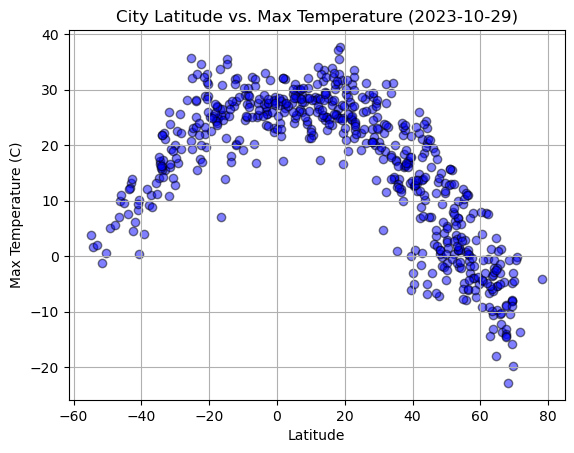

In [75]:
# Build scatter plot for latitude vs. temperature
# https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

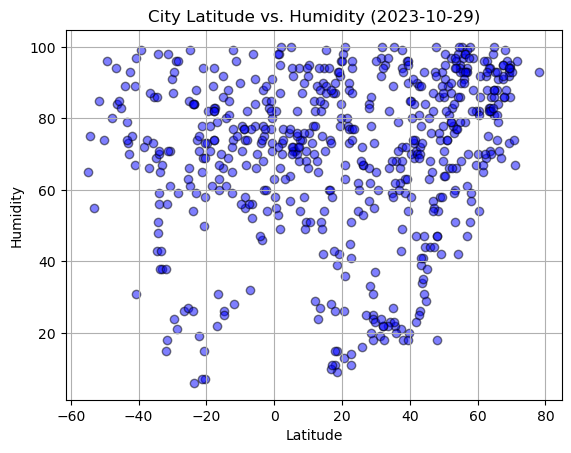

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("City Latitude vs. Humidity (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

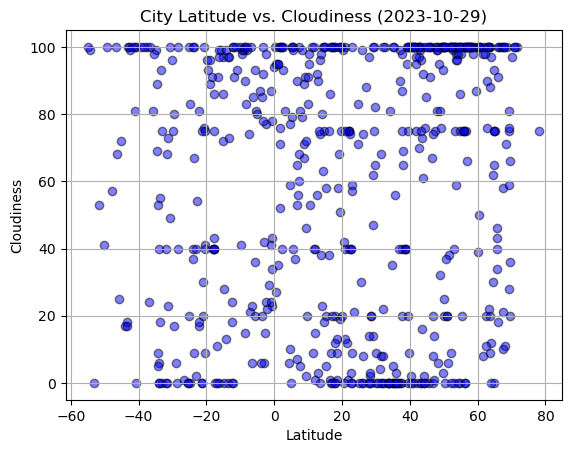

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("City Latitude vs. Cloudiness (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

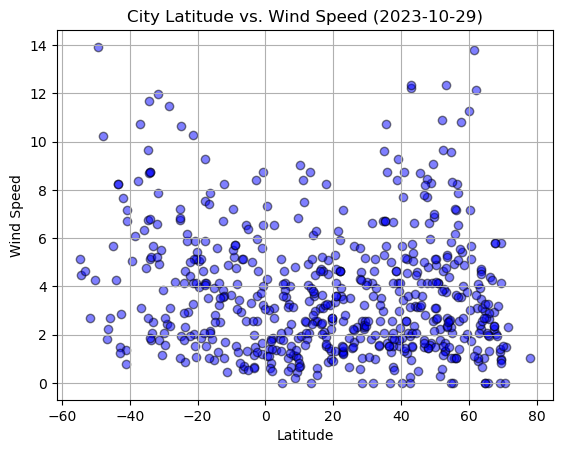

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.title("City Latitude vs. Wind Speed (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def LinearRegressionLine(x_value,y_value):
    x = x_value
    y = y_value
    
    lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(x, y)
    lat_fit = lat_slope * x + lat_int
    
    print(f"The r value is: {lat_r}")
    plt.plot(x,lat_fit,"-",color='r')

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,le vauclin,14.5452,-60.8388,25.03,94,75,2.57,MQ,1698569747
2,el granada,37.5027,-122.4694,16.12,43,0,2.57,US,1698569582
5,tromso,69.6496,18.9570,-2.99,86,20,4.12,NO,1698569747
7,sept-iles,50.2001,-66.3821,3.00,64,20,5.14,CA,1698569522
8,sarupathar,26.1984,93.8094,31.12,67,8,1.70,IN,1698569748


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.18,73,100,1.48,AU,1698569537
3,waitangi,-43.9535,-176.5597,7.68,89,17,4.26,NZ,1698569545
4,puerto ayora,-0.7393,-90.3518,23.08,91,34,4.02,EC,1698569547
6,adamstown,-25.0660,-130.1015,22.31,85,100,6.77,PN,1698569540
13,west island,-12.1568,96.8225,27.99,74,100,8.23,CC,1698569572


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8771480596114045


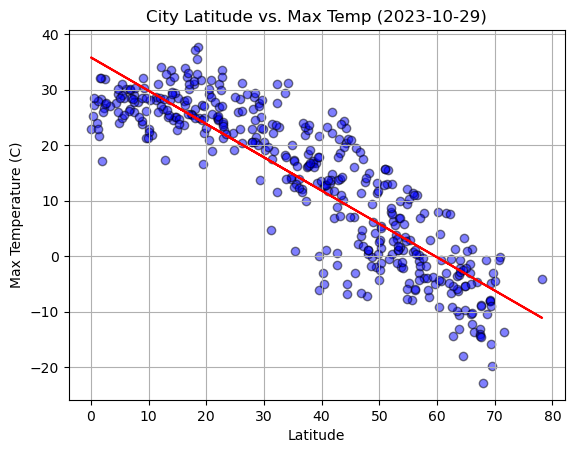

In [82]:
# Linear regression on Northern Hemisphere
y_variable = "Max Temp"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable])

# Show plot
plt.show()

The r value is: 0.7703635006590059


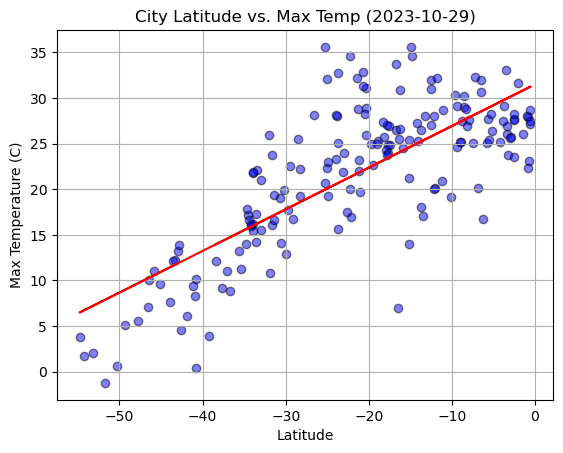

In [83]:
# Linear regression on Southern Hemisphere
y_variable = "Max Temp"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable])

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear correlation between latitude and temperature is positive, and has a strong to very strong correlation. According to the r-value, if you are close to 0, you have a great chance in being in a warmer city.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.23088634606984115


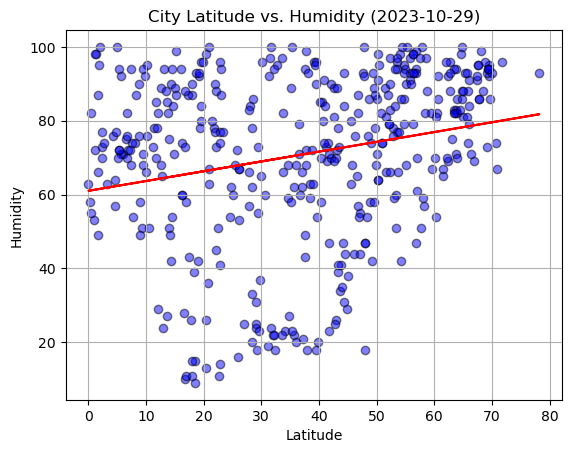

In [84]:
# Northern Hemisphere
y_variable = "Humidity"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable])

# Show plot
plt.show()

The r value is: -0.00035874081176289293


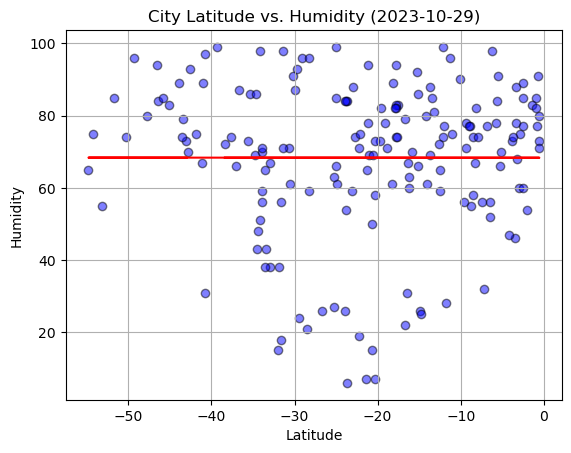

In [85]:
# Southern Hemisphere
y_variable = "Humidity"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable])

# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and humidity seem to be very weak to weak. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.1297528734327501


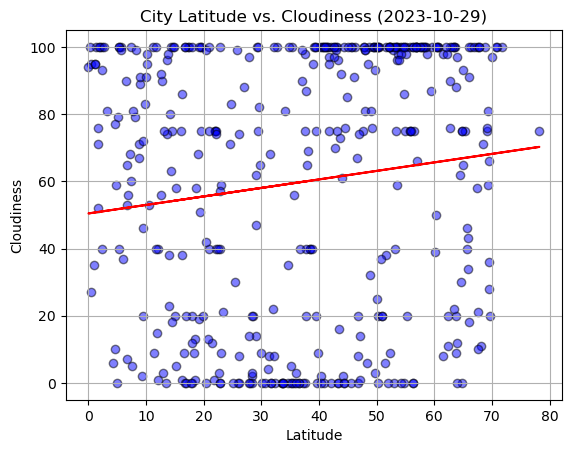

In [86]:
# Northern Hemisphere
y_variable = "Cloudiness"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable])

# Show plot
plt.show()

The r value is: -0.007011244161559016


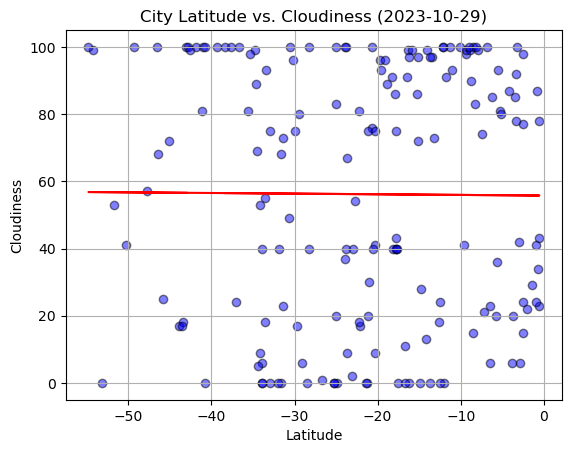

In [87]:
# Southern Hemisphere
y_variable = "Cloudiness"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable])

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and latitude. Latitude and cloudiness seem not to be related. There are only a few values that are not 0 or 100.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.10168699553818243


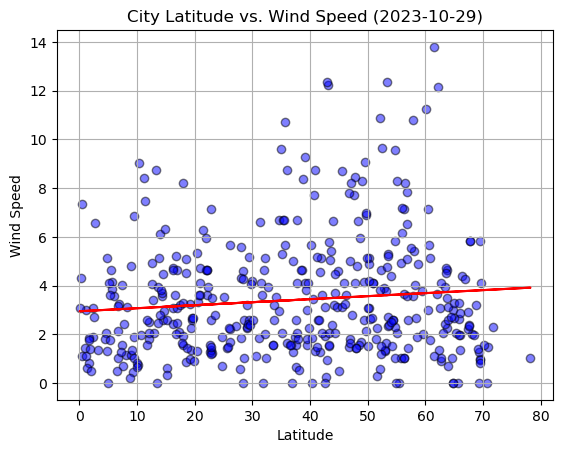

In [88]:
# Northern Hemisphere
y_variable = "Wind Speed"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable])

# Show plot
plt.show()

The r value is: -0.2517123762208018


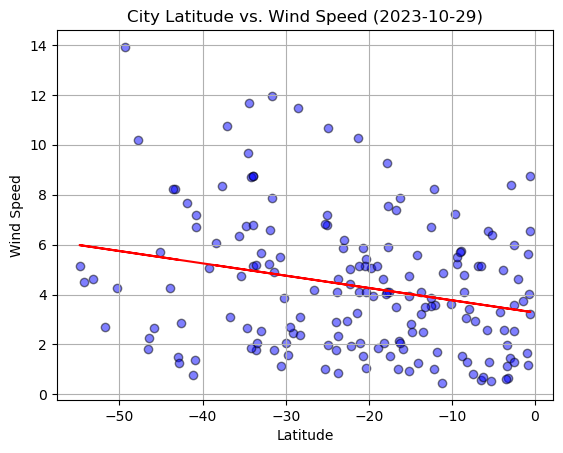

In [89]:
# Southern Hemisphere
y_variable = "Wind Speed"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable])

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak negative, to weak correlation between wind speed and latitude. Because the northern hemisphere has a positive weak correlation, and the southern has a negative weak correlation, other factors need to be considered, like the season these cities are in.